<a href="https://colab.research.google.com/github/seeun7/python-programming/blob/main/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*#인공지능 HW2 202310954 컴퓨터과학전공 이세은#*

필요한 모듈을 import 해온다

In [15]:
import numpy as np
import matplotlib.pyplot as plt

구글 드라이버 마운팅

In [16]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


접근할 폴더 설정, 확인

In [17]:
%cd /content/drive/MyDrive/AI/
!pwd

/content/drive/MyDrive/AI
/content/drive/MyDrive/AI


pickle 모듈의 open 메소드를 활용해 파일 읽어들인 후, 파일을 이미지로 만들어 분리하고 training image와 label으로 합치기

In [18]:
import pickle
def unpickle(file):
  with open(file, 'rb') as fo:
    dict = pickle.load(fo, encoding='bytes')
  return dict
bat1 = unpickle('data_batch_1')
bat2 = unpickle('data_batch_2')
bat3 = unpickle('data_batch_3')
bat4 = unpickle('data_batch_4')
bat5 = unpickle('data_batch_5')
bat_test = unpickle('test_batch')
data = np.concatenate([bat1[b'data'], bat2[b'data'], bat3[b'data'],bat4[b'data'],
bat5[b'data']])
labels = np.concatenate([bat1[b'labels'], bat2[b'labels'], bat3[b'labels'],bat4[b'labels'],
bat5[b'labels']])

컴퓨터에 저장된 knn.py 파일 임포트

In [19]:
from google.colab import files
files.upload()

Saving knn.py to knn (3).py


{'knn (3).py': b'# -*- coding: utf-8 -*-\n"""knn.ipynb\n\nAutomatically generated by Colaboratory.\n\nOriginal file is located at\n    https://colab.research.google.com/drive/1ifJF-fUPLbJoNXC3XRKVIjpJv1L4kZOD\n\n*#\xec\x9d\xb8\xea\xb3\xb5\xec\xa7\x80\xeb\x8a\xa5 HW2 202310954 \xec\xbb\xb4\xed\x93\xa8\xed\x84\xb0\xea\xb3\xbc\xed\x95\x99\xec\xa0\x84\xea\xb3\xb5 \xec\x9d\xb4\xec\x84\xb8\xec\x9d\x80#*\n\n\xec\x95\x84\xeb\x9e\x98 \xed\x81\xb4\xeb\x9e\x98\xec\x8a\xa4\xeb\x8a\x94 \xea\xb8\xb0\xec\xa1\xb4 NearestNeighbor\xec\x97\x90\xec\x84\x9c \xec\x82\xac\xec\x9a\xa9\xec\x9e\x90\xea\xb0\x80 \xec\x9b\x90\xed\x95\x98\xeb\x8a\x94 k\xea\xb0\x92\xec\x9d\x84 \xec\x84\xa4\xec\xa0\x95\xed\x95\x98\xea\xb1\xb0\xeb\x82\x98 \xea\xb1\xb0\xeb\xa6\xac(distance)\xeb\xa5\xbc \xea\xb5\xac\xed\x95\x98\xeb\x8a\x94 \xeb\xb0\xa9\xeb\xb2\x95 \xeb\x91\x90\xea\xb0\x80\xec\xa7\x80(L1,L2)\xec\xa4\x91 \xed\x95\x98\xeb\x82\x98\xeb\xa5\xbc \xec\x84\xa0\xed\x83\x9d\xed\x95\xb4\xec\x84\x9c \xeb\xa7\xa4\xea\xb0\x9c\xeb\xb3\

knn.py 속 클래스가 의도한대로 정상 작동하는지 테스트하기 위한 코드.
반복문을 이용해 올바른 k값이 입력될 때까지 입력받고, 그 k값을 클래스 안의 predict 메서드에 매개변수로 전달한다. 또한 함수를 호출할 때 거리를 구할 방법 (L1 or L2)을 매개변수로 입력받는다. 아래 코드는 13을 입력했을 경우이다.

In [20]:
from knn import NearestNeighbor
train_data = data
train_label = labels
test_data = bat_test[b'data']
test_label = bat_test[b'labels']
test_size = 10
NN = NearestNeighbor()
NN.train(train_data,train_label)
while True:
  k=int(input("1~15사이의 홀수를 입력하세요:"))
  if k>15 or k<1 or k%2==0:
    print("잘못된 입력입니다.")
  else:
    break
test_in = test_data[0:test_size]
pred = NN.predict(test_in, k,'L1')
num_correct = np.sum(pred == test_label[0:test_size])
accuracy = float(num_correct) / test_size
print(pred)
print(test_label[0:test_size])
print("The accuracy is (%):", accuracy*100)

1~15사이의 홀수를 입력하세요:13
[0 1 8 0 0 2 4 2 0 1]
[3, 8, 8, 0, 6, 6, 1, 6, 3, 1]
The accuracy is (%): 30.0


아래 코드는 반대로 3을 입력했을 경우이다. 정확도가 k값에 따라 다르게 나오는 것을 확인할 수 있다.

In [21]:
while True:
  k=int(input("1~15사이의 홀수를 입력하세요:"))
  if k>15 or k<1 or k%2==0:
    print("잘못된 입력입니다.")
  else:
    break
test_in = test_data[0:test_size]
pred = NN.predict(test_in, k,'L1')
num_correct = np.sum(pred == test_label[0:test_size])
accuracy = float(num_correct) / test_size
print(pred)
print(test_label[0:test_size])
print("The accuracy is (%):", accuracy*100)

1~15사이의 홀수를 입력하세요:3
[0 8 1 0 0 0 4 0 0 8]
[3, 8, 8, 0, 6, 6, 1, 6, 3, 1]
The accuracy is (%): 20.0


아래 코드는 가능한 k값을 모두 k_values라는 리스트에 정의하고 반복문을 이용해 각 k값에 따른 정확도를 acc_L1 리스트에 정리한 후 matplotlib.pyplot을 이용해 L1 계산법을 이용할 때의 각 k값에 따른 정확도의 변화를 보여주는 그래프를 그린다.

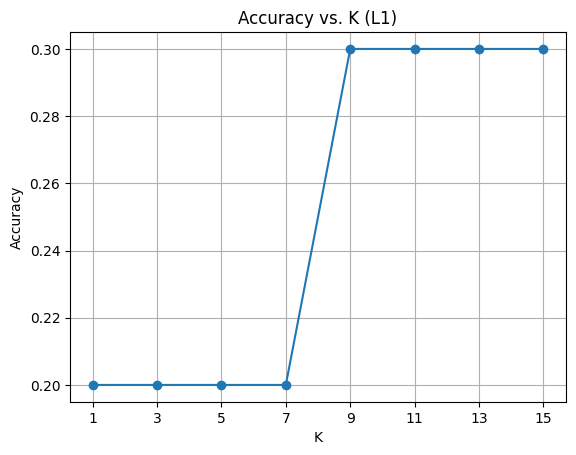

In [22]:
k_values =[1,3,5,7,9,11,13,15] #가능한 모든 k값 설정
acc_L1= [] #distance 계산 방법이 L1일 때 각 k값에 따른 정확도 저장 리스트

for k in k_values:
    NN = NearestNeighbor()
    NN.train(train_data, train_label)
    test_in = test_data[:test_size]
    pred = NN.predict(test_in,k,'L1')

    num_correct = np.sum(pred == test_label[:test_size])
    accuracy = float(num_correct) / test_size
    acc_L1.append(accuracy)

# 그래프 그리기
plt.plot(k_values, acc_L1, marker='o')
plt.title('Accuracy vs. K (L1)')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

위의 코드와 동일한 k값 리스트를 정의한 후 predict 메소드의 매개변수를 L2로 주면 L2 계산법으로 거리 및 정확도를 구하여 acc_L2에 정확도를 정리하고 각 k값에 따른 정확도 그래프를 그린다.

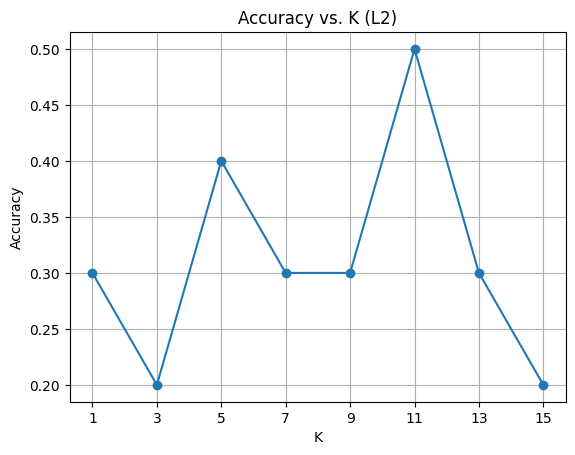

In [23]:
k_values =[1,3,5,7,9,11,13,15] #가능한 모든 k값 설정
acc_L2= [] #distance 계산 방법이 L2일 때 각 k값에 따른 정확도 저장 리스트

for k in k_values:
    NN = NearestNeighbor()
    NN.train(train_data, train_label)
    test_in = test_data[:test_size]
    pred = NN.predict(test_in,k,"L2")

    num_correct = np.sum(pred == test_label[:test_size])
    accuracy = float(num_correct) / test_size
    acc_L2.append(accuracy)

# 그래프 그리기
plt.plot(k_values, acc_L2, marker='o')
plt.title('Accuracy vs. K (L2)')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

L1과 L2계산법에 따른 정확도 차이를 시각적으로 보기 쉽게 나타내기 위해 하나의 평면에 k값에 따른 L2와 L1의 정확도 모두를 나타냈다. x축은 k값을, y축은 k값에 따라 두가지 방법으로 계산한 정확도를 나타낸다.

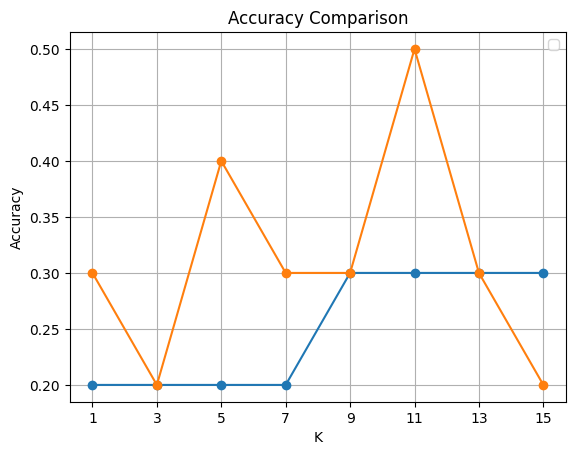

In [24]:
plt.plot(k_values, acc_L1, marker='o')
plt.plot(k_values, acc_L2, marker='o')
plt.title('Accuracy Comparison')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

추가로 k값을 입력받을 때의 예외처리가 제대로 되었는지 확인하기 위해 짝수, 음수, 15를 초과한 수를 입력해 본 경우이다. 올바른 수를 입력할 때까지 k값을 다시 입력받는 것을 확인할 수 있다.

In [25]:
while True:
  k=int(input("1~15사이의 홀수를 입력하세요:"))
  if k>15 or k<1 or k%2==0:
    print("잘못된 입력입니다.")
  else:
    break
test_in = test_data[0:test_size]
pred = NN.predict(test_in, k,'L1')
num_correct = np.sum(pred == test_label[0:test_size])
accuracy = float(num_correct) / test_size
print(pred)
print(test_label[0:test_size])
print("The accuracy is (%):", accuracy*100)

1~15사이의 홀수를 입력하세요:6
잘못된 입력입니다.
1~15사이의 홀수를 입력하세요:-1
잘못된 입력입니다.
1~15사이의 홀수를 입력하세요:90
잘못된 입력입니다.
1~15사이의 홀수를 입력하세요:5
[0 1 8 0 0 2 4 0 0 8]
[3, 8, 8, 0, 6, 6, 1, 6, 3, 1]
The accuracy is (%): 20.0
